In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical, plot_model
from utils.utils import plot_images

# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

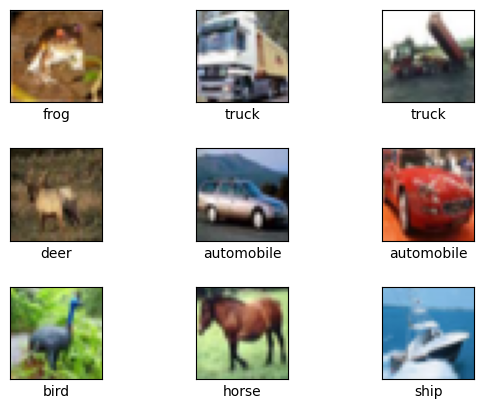

In [2]:
# Plot 9 images from the training dataset
plot_images(X_train, y_train, 3, 3)


***Normalization*** is a step in preparing data for machine learning that makes all the data similar in scale. This is important because:

- Helps Learn Faster: It makes the machine learning model learn and make predictions faster.
- Fair Treatment: Ensures every piece of data is treated equally by the model, so no single type of data overpowers others.
- Better Predictions: Leads to more accurate and stable predictions from the model.
- Works Well with Many Models: Some machine learning models need data to be normalized to work correctly.
- Avoids Problems: Prevents issues that can happen when data is in very different scales.

In [4]:
## Preprocess data

X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to be between 0 and 1, the maximum value of a pixel in an image is 255.0. you can print a sample image to see the pixel values.

# Convert labels to one-hot encoding if necessary
y_train = tf.keras.utils.to_categorical(y_train, 10) # convert to one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, 10) 

In [5]:
# Reshape the input data to 1D array for the input layer, Since we are using a fully connected network
x_train = X_train.reshape(X_train.shape[0],-1)
x_test = X_test.reshape(X_test.shape[0],-1)

In [6]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Number of classes
num_classes = 10  # CIFAR-10 total classes (0-9)

model = Sequential([
    # First layer (input layer): Specify input shape
    Dense(1024, activation='relu', input_shape=(3072,)),
    # Second layer
    Dense(512, activation='relu'),
    # Third layer
    Dense(256, activation='relu'),
    # Fourth layer
    Dense(128, activation='relu'),
    # Output layer: Use softmax for multi-class classification
    layers.Dense(num_classes, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, shuffle=True, validation_split=0.2)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3837066 (14.64 MB)
Trainable params: 3837066 (14.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50


2

: 

## CNNS

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Define the model
model = Sequential([
    
    Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),  ``
    Flatten(),
    # Dense layers
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()
